# Library Initiation

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

# Import CSV files from the same folder
data_pelanggan = pd.read_csv("data_pelanggan.csv")
data_produk = pd.read_csv("data_produk.csv")
data_transaksi = pd.read_csv("data_transaksi.csv")

# Data Preview

Pada bagian ini dilakukan data preview untuk mendapatkan gambaran dari masing-masing data

## Data Pelanggan

In [5]:
data_pelanggan

,customer_id,nama_pelanggan,jumlah_pembelian,terakhir_beli,feedback
0,CORP-01,PT Makanan Sehat,10,2025-08-17,Akan menjadi langganan tetap.
1,CORP-02,CV Minuman Segar,7,2025-08-11,Harga sangat kompetitif.
2,CORP-03,UMKM Dapur Bunda,14,2025-08-18,Pengiriman selalu tepat waktu.
3,CORP-04,Kopi Kita Bersama,9,2025-08-18,Kualitas produk konsisten.
4,CORP-05,Pabrik Keripik Renyah,10,2025-08-15,Kualitas produk konsisten.
5,CORP-06,PT Herbal Alami,7,2025-07-13,Stok selalu tersedia.
6,CORP-07,Brand Skincare Cantika,13,2025-08-17,Akan menjadi langganan tetap.
7,CORP-08,Jus Buah Segaria,6,2025-08-07,Akan menjadi langganan tetap.
8,CORP-09,Sambal Nona Roa,7,2025-08-18,Akan menjadi langganan tetap.
9,CORP-10,PT Roti Enak,8,2025-08-15,Pelayanan customer service memuaskan.


## Data Produk

In [8]:
data_produk

,product_id,nama_produk,kategori,harga_satuan,stok
0,PKG-BTL-01,Botol PET Bening 500ml,Kemasan Primer,1200,50000
1,PKG-BOX-01,Karton Box Die Cut 20x15x8,Kemasan Sekunder,3100,15000
2,PKG-TRY-01,Tray Makanan Mika 4 Sekat,Kemasan Primer,800,75000
3,PKG-PCH-01,Standing Pouch Aluminium 250g,Kemasan Primer,1500,40000
4,PKG-LBL-01,Stiker Label Vinyl Tahan Air,Komponen,350,250000
5,PKG-BTL-02,Botol Kaca Amber 250ml,Kemasan Primer,2500,30000
6,PKG-CAP-01,Tutup Botol Ulir 28mm,Komponen,250,500000
7,PKG-BOX-02,Dus Produk Glossy 10x10x10,Kemasan Primer,2800,25000


## Data Transaksi

In [9]:
pd.set_option('display.float_format', '{:.2f}'.format)
data_transaksi.head(10)

,order_id,tanggal,reseller_id,customer_id,product_id,qty,harga,margin
0,PO-2508-001,2025-07-31,RESL-A,CORP-05,PKG-BOX-02,1000,2800000,615551.21
1,PO-2508-002,2025-08-08,RESL-A,CORP-07,PKG-PCH-01,2000,3000000,476495.07
2,PO-2508-003,2025-08-03,RESL-C,CORP-03,PKG-PCH-01,7500,11250000,1983238.16
3,PO-2508-004,2025-07-01,RESL-C,CORP-04,PKG-PCH-01,2500,3750000,657268.85
4,PO-2508-005,2025-08-17,RESL-C,CORP-04,PKG-TRY-01,2000,1600000,312884.09
5,PO-2508-006,2025-08-02,RESL-C,CORP-09,PKG-BTL-02,5000,12500000,2106996.16
6,PO-2508-007,2025-08-18,RESL-A,CORP-09,PKG-BTL-01,2500,3000000,688886.67
7,PO-2508-008,2025-07-12,RESL-B,CORP-02,PKG-PCH-01,10000,15000000,3255027.99
8,PO-2508-009,2025-08-07,RESL-B,CORP-09,PKG-BTL-02,10000,25000000,5077813.47
9,PO-2508-010,2025-08-18,RESL-A,CORP-03,PKG-CAP-01,5000,1250000,252916.83


Karena data transaksi cukup banyak, maka dibuat data overview untuk mendapatkan gambaran keseluruhan data. Pada bagian ini juga dilakukan konversi data tanggal menjadi tipe datetime.

In [35]:
data_transaksi['tanggal'] = pd.to_datetime(data_transaksi['tanggal'])
def check_values(data_transaksi):
    data = []
    for col in data_transaksi.columns:
        data.append([col, \
                     data_transaksi[col].dtype, \
                     data_transaksi[col].isna().sum(), \
                     round(100*(data_transaksi[col].isna().sum()/len(data_transaksi)),2), \
                     data_transaksi[col].nunique(), \
                     data_transaksi[col].unique()
                     ])
    return pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueValue'],data=data)
check_values(data_transaksi)

,dataFeatures,dataType,null,nullPct,unique,uniqueValue
0,order_id,object,0,0.00,100,"[PO-2508-001, PO-2508-002, PO-2508-003, PO-250..."
1,tanggal,datetime64[ns],0,0.00,45,"[2025-07-31 00:00:00, 2025-08-08 00:00:00, 202..."
2,reseller_id,object,0,0.00,3,"[RESL-A, RESL-C, RESL-B]"
3,customer_id,object,0,0.00,12,"[CORP-05, CORP-07, CORP-03, CORP-04, CORP-09, ..."
4,product_id,object,0,0.00,8,"[PKG-BOX-02, PKG-PCH-01, PKG-TRY-01, PKG-BTL-0..."
5,qty,int64,0,0.00,7,"[1000, 2000, 7500, 2500, 5000, 10000, 500]"
6,harga,int64,0,0.00,46,"[2800000, 3000000, 11250000, 3750000, 1600000,..."
7,margin,float64,0,0.00,100,"[615551.2149716471, 476495.06842183264, 198323..."


# Data Master

## Penggabungan data master

In [ ]:
# Merge on product_id
df_merged = pd.merge(data_transaksi, data_produk, on="product_id", how="left")
df_full = pd.merge(df_merged, data_pelanggan, on="customer_id", how="left")
df_full = df_full.sort_values("tanggal")

# Extract month number
df_full['bulan_transaksi'] = df_full['tanggal'].dt.month

# Extract month name
df_full['bulan_transaksi'] = df_full['tanggal'].dt.strftime('%B')

df_full

,order_id,tanggal,reseller_id,customer_id,product_id,qty,harga,margin,nama_produk,kategori,harga_satuan,stok,nama_pelanggan,jumlah_pembelian,terakhir_beli,feedback,bulan_transaksi
25,PO-2508-026,2025-07-01,RESL-A,CORP-04,PKG-BOX-01,1000,3100000,679699.15,Karton Box Die Cut 20x15x8,Kemasan Sekunder,3100,15000,Kopi Kita Bersama,9,2025-08-18,Kualitas produk konsisten.,July
3,PO-2508-004,2025-07-01,RESL-C,CORP-04,PKG-PCH-01,2500,3750000,657268.85,Standing Pouch Aluminium 250g,Kemasan Primer,1500,40000,Kopi Kita Bersama,9,2025-08-18,Kualitas produk konsisten.,July
20,PO-2508-021,2025-07-02,RESL-C,CORP-01,PKG-PCH-01,7500,11250000,1837491.95,Standing Pouch Aluminium 250g,Kemasan Primer,1500,40000,PT Makanan Sehat,10,2025-08-17,Akan menjadi langganan tetap.,July
85,PO-2508-086,2025-07-02,RESL-A,CORP-07,PKG-BTL-01,2500,3000000,698084.16,Botol PET Bening 500ml,Kemasan Primer,1200,50000,Brand Skincare Cantika,13,2025-08-17,Akan menjadi langganan tetap.,July
44,PO-2508-045,2025-07-03,RESL-B,CORP-06,PKG-BOX-02,10000,28000000,5462818.45,Dus Produk Glossy 10x10x10,Kemasan Primer,2800,25000,PT Herbal Alami,7,2025-07-13,Stok selalu tersedia.,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,PO-2508-097,2025-08-17,RESL-A,CORP-01,PKG-LBL-01,1000,350000,82895.13,Stiker Label Vinyl Tahan Air,Komponen,350,250000,PT Makanan Sehat,10,2025-08-17,Akan menjadi langganan tetap.,August
36,PO-2508-037,2025-08-17,RESL-C,CORP-07,PKG-BTL-01,7500,9000000,1815517.98,Botol PET Bening 500ml,Kemasan Primer,1200,50000,Brand Skincare Cantika,13,2025-08-17,Akan menjadi langganan tetap.,August
6,PO-2508-007,2025-08-18,RESL-A,CORP-09,PKG-BTL-01,2500,3000000,688886.67,Botol PET Bening 500ml,Kemasan Primer,1200,50000,Sambal Nona Roa,7,2025-08-18,Akan menjadi langganan tetap.,August
9,PO-2508-010,2025-08-18,RESL-A,CORP-03,PKG-CAP-01,5000,1250000,252916.83,Tutup Botol Ulir 28mm,Komponen,250,500000,UMKM Dapur Bunda,14,2025-08-18,Pengiriman selalu tepat waktu.,August


In [12]:
def check_values(df_full):
    data = []
    for col in df_full.columns:
        data.append([col, \
                     df_full[col].dtype, \
                     df_full[col].isna().sum(), \
                     round(100*(df_full[col].isna().sum()/len(df_full)),2), \
                     df_full[col].nunique(), \
                     df_full[col].unique()
                     ])
    return pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueValue'],data=data)
check_values(df_full)

,dataFeatures,dataType,null,nullPct,unique,uniqueValue
0,order_id,object,0,0.00,100,"[PO-2508-026, PO-2508-004, PO-2508-021, PO-250..."
1,tanggal,datetime64[ns],0,0.00,45,"[2025-07-01 00:00:00, 2025-07-02 00:00:00, 202..."
2,reseller_id,object,0,0.00,3,"[RESL-A, RESL-C, RESL-B]"
3,customer_id,object,0,0.00,12,"[CORP-04, CORP-01, CORP-07, CORP-06, CORP-12, ..."
4,product_id,object,0,0.00,8,"[PKG-BOX-01, PKG-PCH-01, PKG-BTL-01, PKG-BOX-0..."
5,qty,int64,0,0.00,7,"[1000, 2500, 7500, 10000, 5000, 2000, 500]"
6,harga,int64,0,0.00,46,"[3100000, 3750000, 11250000, 3000000, 28000000..."
7,margin,float64,0,0.00,100,"[679699.1545270545, 657268.8469050435, 1837491..."
8,nama_produk,object,0,0.00,8,"[Karton Box Die Cut 20x15x8, Standing Pouch Al..."
9,kategori,object,0,0.00,3,"[Kemasan Sekunder, Kemasan Primer, Komponen]"


# Rekomendasi Produk

Saya mengelompokkan pembelian customer setiap bulan untuk melihat produk apa saja yang sering dibeli bersamaan.
Dari pola tersebut, dapat ditemukan kecenderungan seperti:
“Kalau customer membeli produk A, mereka sering juga membeli produk B.”

Berdasarkan temuan ini, saya dapat memberikan rekomendasi produk yang cocok ditawarkan bersama.

Untuk pengelompokkan ini, saya menggunakan algoritma apriori yang umum digunakan untuk menentukan rekomendasi berdasarkan pertimbangan berikut:

### 1. Data Awal
- Total transaksi: **100**  
- Produk unik: **8**  
- Karena setiap transaksi hanya berisi **1 produk**, saya **mengelompokkan data per bulan per customer**, sehingga dapat ditemukan minimal dua produk dalam satu kelompok yang sama dan dapat dilakukan penentuan rekomendasi.  

### 2. Nilai Parameter
1. **`min_support = 0.05` (5%)**  
   - Artinya kombinasi produk harus muncul minimal di **5 keranjang** dari total 100.  
   - Angka ini dipilih karena pola yang jarang tetap terlihat, tapi tidak terlalu banyak _noise_.  

2. **`confidence = 0.3` (30%)**  
   - Artinya kalau ada 10 customer beli A, minimal 3 orang juga beli B.  
   - Angka 30% karena cukup rendah agar pola tidak hilang, tapi masih cukup tinggi sehingga rekomendasi masih masuk akal.  

3. **`lift > 1.2`**  
   - Lift = 1 berarti hanya kebetulan.  
   - Dengan batas 1.2, dipastikan hubungan produk yang muncul bukan sekadar kebetulan.  



In [14]:
basket = df_full.groupby(['bulan_transaksi', 'customer_id', 'nama_produk'])['nama_produk'] \
           .count().unstack().reset_index().fillna(0).set_index(['bulan_transaksi', 'customer_id'])

# Convert quantities to 1/0 (presence of product)
basket = basket > 0 

# Apply Apriori Algorithm
frequent_itemsets = apriori(basket, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# Filter by lift > 1.2 (stronger relationships)
rules = rules[rules['lift'] > 1.2]

Setelah algoritma dijalankan, kita dapat menentukan rekomendasi yang mungkin dan cukup kuat. Di sini saya menampilkan rekomendasi 5 teratas berdasarkan kemungkinannya.

In [15]:
top_rules = rules.head(5)
print("Top 5 Product Recommendations:\n")
for idx, row in top_rules.iterrows():
    antecedent = ', '.join(list(row['antecedents']))
    consequent = ', '.join(list(row['consequents']))
    print(f"Jika customer membeli {antecedent}, rekomendasikan {consequent}"
          f" (support={row['support']:.2f}, confidence={row['confidence']:.2f}, lift={row['lift']:.2f})")

Top 5 Product Recommendations:

Jika customer membeli Botol PET Bening 500ml, rekomendasikan Tray Makanan Mika 4 Sekat (support=0.27, confidence=0.43, lift=1.35)
Jika customer membeli Tray Makanan Mika 4 Sekat, rekomendasikan Botol PET Bening 500ml (support=0.27, confidence=0.86, lift=1.35)
Jika customer membeli Dus Produk Glossy 10x10x10, rekomendasikan Stiker Label Vinyl Tahan Air (support=0.18, confidence=0.50, lift=1.38)
Jika customer membeli Stiker Label Vinyl Tahan Air, rekomendasikan Dus Produk Glossy 10x10x10 (support=0.18, confidence=0.50, lift=1.38)
Jika customer membeli Karton Box Die Cut 20x15x8, rekomendasikan Standing Pouch Aluminium 250g (support=0.23, confidence=1.00, lift=1.69)


# Segmentasi Pelanggan

Untuk melakukan segmentasi pelanggan, digunakan salah satu metode segmentasi, yaitu RFM Segmentation yang melakukan segmentasi berdasarkan tiga aspek:
- Recency atau seberapa baru, dalam kasus ini seberapa baru transaksi terakhir terjadi
- Frekuensi atau seberapa sering, dalam kasus ini seberapa sering transaksi terjadi
- Monetary atau nilai transaksi pelanggan

In [16]:
# 1. Set reference date for Recency calculation
reference_date = df_full['tanggal'].max() + pd.Timedelta(days=1)

# 2. Build RFM table
rfm = df_full.groupby('nama_pelanggan').agg({
    'tanggal': lambda x: (reference_date - x.max()).days,  # Recency = days since last purchase
    'order_id': 'nunique',                                # Frequency = unique transactions
    'margin': 'sum'                                       # Monetary = total margin (profit)
}).reset_index()

# Rename columns
rfm.columns = ['nama_pelanggan', 'Recency', 'Frequency', 'Monetary']

# 3. Create RFM Scores (1–5 scale, higher = better)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1]).astype(int)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)

# 4. Combine scores into RFM Segment
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# 5. Calculate RFM Score (sum of scores)
rfm['RFM_Score'] = rfm[['R_Score','F_Score','M_Score']].sum(axis=1)

# 6. Example segmentation based on RFM Score
def segment_customer(score):
    if score >= 12:
        return 'Champions'
    elif score >= 9:
        return 'Loyal Customers'
    elif score >= 6:
        return 'Potential Loyalist'
    else:
        return 'At Risk'

rfm['Segment'] = rfm['RFM_Score'].apply(segment_customer)

# --- Show results ---
rfm


,nama_pelanggan,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Segment
0,Brand Skincare Cantika,2,13,20444840.64,4,5,5,455,14,Champions
1,CV Minuman Segar,8,7,16475923.21,2,2,5,225,9,Loyal Customers
2,CV Snack Gurih,29,3,1762396.39,1,1,1,111,3,At Risk
3,Jus Buah Segaria,12,6,1944673.91,2,1,1,211,4,At Risk
4,Kopi Kita Bersama,1,9,5703854.86,5,4,2,542,11,Loyal Customers
5,PT Herbal Alami,37,7,12068900.53,1,2,4,124,7,Potential Loyalist
6,PT Makanan Sehat,2,10,10537781.31,4,4,2,442,10,Loyal Customers
7,PT Roti Enak,4,8,11204167.71,3,3,3,333,9,Loyal Customers
8,Pabrik Keripik Renyah,4,10,14671658.57,3,5,4,354,12,Champions
9,Sambal Nona Roa,1,7,10922140.33,5,3,3,533,11,Loyal Customers


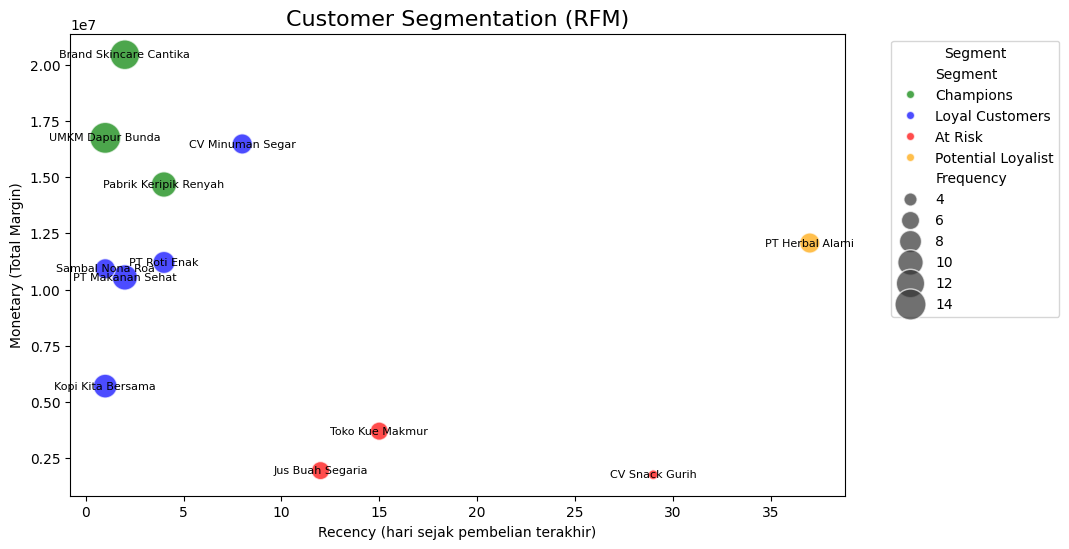

In [18]:
# Scatter plot: Recency vs Monetary, size = Frequency, color = Segment
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=rfm,
    x="Recency", 
    y="Monetary", 
    size="Frequency", 
    hue="Segment",
    palette={
        "Champions":"green", 
        "Loyal Customers":"blue", 
        "Potential Loyalist":"orange", 
        "At Risk":"red"
    },
    sizes=(50, 500),
    alpha=0.7
)

for i, row in rfm.iterrows():
    plt.text(
        row["Recency"], 
        row["Monetary"], 
        str(row["nama_pelanggan"]),   # ganti 'CustomerID' dengan kolom nama customer kamu
        fontsize=8, 
        ha='center', 
        va='center'
    )

plt.title("Customer Segmentation (RFM)", fontsize=16)
plt.xlabel("Recency (hari sejak pembelian terakhir)")
plt.ylabel("Monetary (Total Margin)")
plt.legend(title="Segment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Berikut penjelasan untuk masing-masing segmen pelanggan, diurutkan dari yang tingkat RFM nya paling tinggi hingga paling rendah:

### Champions
- Kriteria:
  - Sering melakukan pembelian
  - Baru saja melakukan transaksi
  - Memberikan kontribusi margin tinggi
- Makna: Pelanggan terbaik, sangat loyal, dan sangat menguntungkan
- Strategi:
  - Berikan program eksklusif (VIP, early access)
  - Hadiah loyalitas atau voucher khusus
  - Bangun hubungan personal (thank-you message, komunikasi langsung)


### Loyal Customers
- Kriteria:
  - Konsisten melakukan pembelian
  - Memberikan profit yang stabil
- Makna: Basis pelanggan yang setia, meski tidak sebesar Champions
- Strategi:
  - Pertahankan dengan promo reguler
  - Tawarkan produk pelengkap (cross-sell, upsell)
  - Dorong menjadi Champions dengan penawaran premium


### Potential Loyalists
- Kriteria:
  - Baru mulai membeli atau frekuensinya masih rendah
  - Menunjukkan potensi margin yang baik
- Makna: Calon pelanggan setia yang bisa tumbuh
- Strategi:
  - Berikan promo percobaan atau diskon khusus
  - Follow-up setelah pembelian pertama
  - Edukasi produk untuk mendorong pembelian ulang

### At Risk
- Kriteria:
  - Jarang melakukan pembelian
  - Sudah lama tidak bertransaksi
  - Margin rendah
- Makna: Berisiko churn (kehilangan pelanggan)
- Strategi:
  - Kirim kampanye reaktivasi ("Kami merindukan Anda")
  - Tawarkan diskon comeback
  - Minta feedback untuk memahami alasan mereka berhenti membeli

### Kesimpulan
- Pertahankan Champions
- Naikkan Potential Loyalists menjadi Loyal/Champions
- Jaga Loyal Customers tetap aktif
- Coba selamatkan At Risk bila potensinya masih besar


# Prediksi Permintaan Stok

## 0. Pemilihan barang untuk diprediksi

Karena yang akan dipilih adalah salah satu produk dengan tingkat penjualan yang tinggi, pertama dilakukan pengolahan data terlebih dahulu. 

In [19]:
top_products = df_full.groupby("nama_produk")["jumlah_pembelian"].sum().sort_values(ascending=False)
print("Produk dengan penjualan tertinggi:\n", top_products)

Produk dengan penjualan tertinggi:
 nama_produk
Botol PET Bening 500ml           213
Standing Pouch Aluminium 250g    164
Botol Kaca Amber 250ml           133
Dus Produk Glossy 10x10x10        99
Tutup Botol Ulir 28mm             92
Stiker Label Vinyl Tahan Air      91
Tray Makanan Mika 4 Sekat         80
Karton Box Die Cut 20x15x8        66
Name: jumlah_pembelian, dtype: int64


Berdasarkan data, produk dengan penjualan tertinggi adalah Botol PET Bening 500ml. Oleh karena itu, untuk prediksi permintaan stok, akan digunakan produk ini. Lalu, karena yang akan diprediksi adalah jumlah permintaan minggu depan, maka perlu ditambahkan kolom `minggu` untuk mengolah data permintaan perminggu. Sehingga dilakukan filtering data untuk hanya mengambil data transaksi Botol PET Bening 500ml dan setelahnya dilakukan pengelompokkan berdasarkan minggu.

In [28]:
df_botol = df_full[df_full["nama_produk"] == "Botol PET Bening 500ml"].copy()
df_botol["minggu"]=df_botol["tanggal"].dt.isocalendar().week
df_botol=df_botol.groupby("minggu")["jumlah_pembelian"].sum()
df_botol.sort_index()
df_botol

minggu
27    34
28    24
29    25
30    37
31    29
32    37
33    20
34     7
Name: jumlah_pembelian, dtype: int64

## 1. Prediksi Minggu Depan

Berdasarkan data tersebut, dilakukan prediksi menggunakan metode Moving Average Mean, karena sesuai dengan kondisi data yang masih terbatas (hanya 8 minggu). Dengan mengambil rata-rata dari beberapa minggu terakhir, metode ini bisa meredam lonjakan atau penurunan yang terlalu ekstrem, misalnya dari 37 unit langsung turun jadi 7 unit seperti yang terjadi dari minggu ke-33 dan minggu ke-34, sehingga hasil prediksi lebih stabil untuk dasar perencanaan stok. 

Metode naive forecast tidak digunakan karena terlalu bergantung pada minggu terakhir sehingga rawan bias, sementara linear regression tidak digunakan karena linear regression mengasumsikan ada tren yang jelas padahal pola datanya belum konsisten. Karena itu, moving average lebih sesuai untuk kasus ini: cukup sederhana, lebih seimbang, dan memberikan gambaran yang realistis untuk kebutuhan jangka pendek.

Berikut prediksi menggunakan metode Moving Mean Average dengan mempertimbangkan angka penjualan dari 3 minggu terakhir.

In [30]:
ma_period = 3
forecast = df_botol.tail(ma_period).mean()
print("Prediksi jumlah pembelian minggu depan:", round(forecast))

Prediksi jumlah pembelian minggu depan: 21


## 2. Safety Stock

Karena permintaan mingguan cukup fluktuatif, diperlukan stok tambahan sebagai cadangan.
Dengan menghitung standar deviasi (simpangan baku) untuk tiga minggu terakhir, didapatkan nilai safety stock sebagai berikut.

In [34]:
safety_stock = df_botol.tail(ma_period).std()
print("Safety stock (persediaan pengaman):", round(safety_stock))

Safety stock (persediaan pengaman): 15



## 3. Minimum Stock

Minimum stock = Safety stock
→ 15 unit

## 4. Reorder Point 
Reorder point adalah patokan jumlah stock untuk melakukan restock. Ketika jumlah stock sudah mencapai reorder point, maka dapat dibilang bahwa sudah waktunya untuk melakukan restock. Pada prediksi ini digunakan asumsi bahwa lead time (waktu yang diperlukan untuk restock) adalah satu minggu, sesuai dengan data stock yang disajikan perminggu.

Rumus:
ROP = (Demand per week × Lead time) + Safety stock

Dengan asumsi lead time = 1 minggu:
ROP = (21 × 1) + 15 = 36

Sehingga didapatkan reorder point sebesar 36 unit.

## Rekomendasi

- Prediksi permintaan minggu depan: 21 unit
- Safety stock: 15 unit
- Minimum stock: 15 unit
- Reorder point: 36 unit